# Week 10 Instructor Led Lab: Data Reduction

**Author**: Brady Woods  
**Course**: BGEN632 Grad. Intro. to Python  
**Term**: Spring 2025  
**Date**: May 07, 2025  

This notebook contains code completing the week ten instructor led lab. 

#### Imports and Setting Directory

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# for pca
from sklearn import preprocessing
from sklearn.decomposition import PCA as pca

# for factor analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# for k-means clustering 
import sklearn.metrics as metcs
from scipy.cluster import hierarchy as hier
from sklearn import cluster as cls
from sklearn.cluster import KMeans

# for decision tree 
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree

# modules for plotting trees
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

In [2]:
os.chdir("/Users/bradywoods/Desktop/week10labs-1/data")
os.getcwd() 

'/Users/bradywoods/Desktop/week10labs-1/data'

In [5]:
cali_df = pd.read_csv("calihospital.txt", sep= "\t")
cali_df.head()

,HospitalID,Name,Zip,Website,TypeControl,Teaching,DonorType,NoFTE,NetPatRev,InOperExp,...,AvlBeds,Work_ID,LastName,FirstName,Gender,PositionID,PositionTitle,Compensation,MaxTerm,StartDate
0,45740,Mammoth Hospital,93546-0660,www.mammothhospital.com,District,Small/Rural,Charity,327.0,135520.2186,20523425.53,...,15,721586,Web,David,M,4,Safety Inspection Member,23987,2,1/1/2012
1,12145,Victor Valley Community Hospital,92392,www.vvch.org,Non Profit,Small/Rural,Charity,345.0,136156.6913,33447542.78,...,99,756481,Rodriguez,Jose,M,1,Regional Representative,46978,4,1/1/2009
2,25667,Pioneers Memorial Hospital,92227,www.pmhd.org,District,Small/Rural,Charity,601.2,197094.2541,37254178.67,...,107,926378,Adamson,David,M,1,Regional Representative,46978,4,1/1/2012
3,46996,Ridgecrest Regional Hospital,93555,www.rrh.org,Non Profit,Small/Rural,Charity,400.0,139170.3798,23385570.10,...,55,856720,Roberts,Melissa,F,4,Safety Inspection Member,23987,2,1/1/2009
4,37393,Barstow Community Hospital,92311,www.barstowhospital.com,Investor,Small/Rural,Charity,262.0,116797.8306,13684502.49,...,42,909709,Iwata,Akira,M,1,Regional Representative,46978,4,1/1/2011


#### PCA Analysis

In [6]:
hospital_cols = ['NetPatRev', 'InOperExp', 'OutOperExp', 'OperRev', 'OperInc', 'NoFTE', 'AvlBeds']
hospital_df = cali_df[hospital_cols].dropna()

# Standardize
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(hospital_df)


In [8]:
pca = pca()
pca.fit(scaled_data)

eigenvalues = pca.explained_variance_
print(eigenvalues)

[5.72134563e+00 1.07657967e+00 1.91383827e-01 9.31699632e-02
 3.29143500e-02 1.27322677e-03 5.91423177e-22]


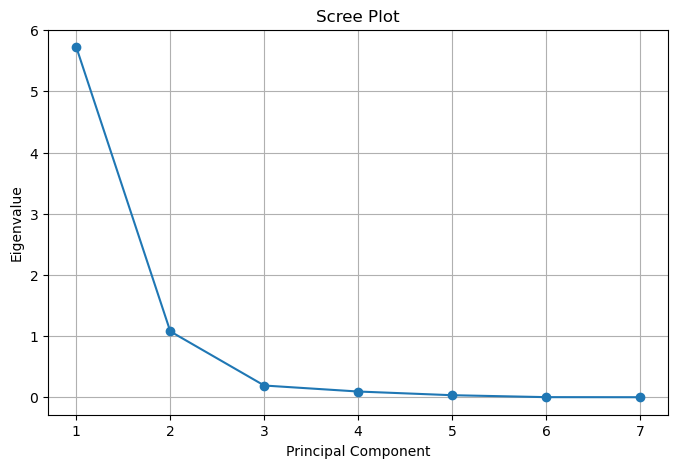

In [9]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

#### Commentary
Based on the eigenvalues for each component, I would keep just the first two. They both have an eigenvalue above one, and they fall on the left side of the "Elbow" pattern that typically determines a good cutoff here. Just having these first two components will capture roughly the same variance compared with using all seven.

#### K-Means Clustering
I originally chose k=3 as an arbitrary start. I will re-evaluate this amountof clusters after conducting the analysis.

In [11]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

hospital_df['Cluster'] = clusters

In [12]:
hospital_df['Teaching'] = cali_df.loc[hospital_df.index, 'Teaching']
hospital_df['TypeControl'] = cali_df.loc[hospital_df.index, 'TypeControl']
hospital_df['DonorType'] = cali_df.loc[hospital_df.index, 'DonorType']

print("Teaching vs Cluster")
print(pd.crosstab(hospital_df['Teaching'], hospital_df['Cluster']), "\n")

print("TypeControl vs Cluster")
print(pd.crosstab(hospital_df['TypeControl'], hospital_df['Cluster']), "\n")

print("DonorType vs Cluster")
print(pd.crosstab(hospital_df['DonorType'], hospital_df['Cluster']), "\n")

Teaching vs Cluster
Cluster      0   1  2
Teaching             
Small/Rural  0  44  0
Teaching     9   2  6 

TypeControl vs Cluster
Cluster      0   1  2
TypeControl          
City/County  5   2  0
District     0  14  0
Investor     0   3  0
Non Profit   4  27  6 

DonorType vs Cluster
Cluster    0   1  2
DonorType          
Alumni     9   2  6
Charity    0  44  0 



I think k=3 does a decent job of clustering here. Since one cluster seems to dominate the other two, I am going to try k=2 and see if we get a better story. 

In [13]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
hospital_df['Cluster'] = clusters

In [14]:
hospital_df['Teaching'] = cali_df.loc[hospital_df.index, 'Teaching']
hospital_df['TypeControl'] = cali_df.loc[hospital_df.index, 'TypeControl']
hospital_df['DonorType'] = cali_df.loc[hospital_df.index, 'DonorType']

print("Teaching vs Cluster")
print(pd.crosstab(hospital_df['Teaching'], hospital_df['Cluster']), "\n")

print("TypeControl vs Cluster")
print(pd.crosstab(hospital_df['TypeControl'], hospital_df['Cluster']), "\n")

print("DonorType vs Cluster")
print(pd.crosstab(hospital_df['DonorType'], hospital_df['Cluster']), "\n")

Teaching vs Cluster
Cluster       0  1
Teaching          
Small/Rural  44  0
Teaching      8  9 

TypeControl vs Cluster
Cluster       0  1
TypeControl       
City/County   5  2
District     14  0
Investor      3  0
Non Profit   30  7 

DonorType vs Cluster
Cluster     0  1
DonorType       
Alumni      8  9
Charity    44  0 



In my opinion, doing two clusters tells a better story of what is going on with this data. Instead of one cluster carrying most of the weight and the other datapoints being split into two random clusters, we get the same dominating cluster and then a cluster that captures the other observations.